In [267]:
import pandas as pd

try:
  print("Reading test data...", end='')
  df_test_data = pd.read_csv("case_data/BikeRentalDaily_test.csv", delimiter=";")
  print(" success")
  print(df_test_data.head())

  print("\nReading training data...", end='')
  df_train_data = pd.read_csv("case_data/BikeRentalDaily_train.csv", delimiter=";")
  print(" success")
  print(df_train_data.head())
except FileNotFoundError:
  print("Fehler beim lesen der Datei. Falscher Pfad?")

# This is used to store the mean absolute errors together with the calculation
# algorithm in the form [method, mean_absolute_error]. Later in this section
# this is used to generate a visual overview of the results
results_method_mae = []

# Features that will be used for model generation
feature_items=["instant", "season", "yr", "month", "holiday", "weekday", "weathersit", "temp", "atemp", "hum", "windspeed", "leaflets", "price reduction"]

# Fix data
train_data_without_nan = df_train_data.dropna()
x_train = train_data_without_nan.filter(items=feature_items).values
y_train = train_data_without_nan.cnt.values

# Question: why do we need to do this?
test_data_without_nan = df_test_data.dropna()
x_test = test_data_without_nan.filter(items=feature_items).values
y_test = test_data_without_nan.cnt.values

print(y_test)

Reading test data... success
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      299  26.10.2011     4.0   0    10        0        3           1   
1      458  02.04.2012     2.0   1     4        0        1           1   
2      687  17.11.2012     4.0   1    11        0        6           0   
3      346  12.12.2011     4.0   0    12        0       -1           1   
4      291  18.10.2011     4.0   0    10        0        2           1   

   weathersit     temp     atemp        hum  windspeed  leaflets  \
0           2  19.3667  0.472846  108.06255   0.148642       605   
1           1  17.3565  0.427513   75.65220   0.312139       518   
2           1  13.0000  0.326383   81.81255   0.179729       766   
3           1   9.5333  0.270196        NaN   0.063450       739   
4           2  21.3000  0.522721  105.25005   0.110087       463   

   price reduction  casual  registered   cnt  
0                0     404        3490  3894  
1                0    1

In [268]:
# Lineare Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

print("Regression coefficients: ",reg.coef_)

#Predict all test examples
ypred = reg.predict(x_test)
#Show first 10 prediction results
print(ypred[0:10])

Regression coefficients:  [ 2.82241690e-01  4.27829815e+02  2.49615050e+03 -3.53156444e+02
  2.16245887e+02 -8.16875154e+02 -1.65586275e+01  7.65463765e+03
 -6.31439074e+00 -7.92200599e+02  1.24254119e+00  3.50622647e+02]
[3431.19605608 5154.25330637 6827.94650892 3434.31616399  670.69630994
 7735.82167601 5956.21990276 6530.12447226 6276.50429156 5482.79503338]


In [269]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["linear regression", mae])

MAE: 1077.909


In [270]:
# Visualize linear regression results
import matplotlib.pyplot as plt

def viz_linear():
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_train, reg.predict(x_train), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
# viz_linear()

In [271]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y_train)

ypred = pol_reg.predict(poly_reg.transform(x_test))

# Question: Warum kommen hier negative werte raus? 
print(ypred[0:10])

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["polynominal regression", mae])

[ 3893.99991506  5176.57233021  3238.935216   -7392.21642401
 -3566.2839483  12674.27573365 16536.87896853  5669.15891695
 47376.81672587 10286.62550682]
MAE: 15897.728


In [272]:
# Macht es sinn ein LSTM model für time series forecasting zu verwenden?
# spielt die zeit komponente eine rolle bei uns? 

In [273]:
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=20)
KNN_reg.fit(x_train, y_train)

#Predict all test examples
ypred = KNN_reg.predict(x_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["KNN", mae])


MAE: 1159.482


In [274]:
df_results = pd.DataFrame(results_method_mae, columns = ['Method', 'MAE'])

# Show results of methods
df_results

,Method,MAE
0,linear regression,1077.908564
1,polynominal regression,15897.728104
2,KNN,1159.482174


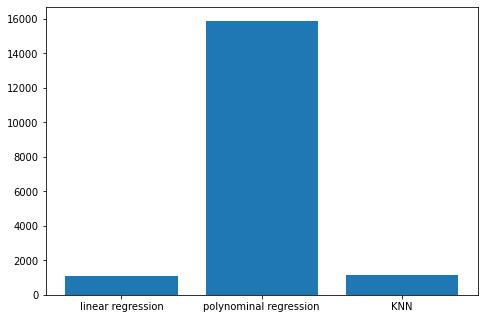

In [275]:
import matplotlib.pyplot as plt

# Visualize resuts of data frame 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df_results.Method,df_results.MAE)
plt.show()